In [18]:
#importing libraries
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential 
from keras.layers import Convolution2D ,MaxPooling2D, Flatten, Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers import BatchNormalization
#supress warning 
import warnings
warnings.filterwarnings('ignore')
##
seed=10
np.random.seed(seed)

In [19]:
import shutil
import random
import os
import numpy as np
name_data=["covid19" , "normal", "viral_pneumonia"]

percent=[70, 25, 5]
# split  covid19 into train, validate and test folders under the CHEST_xray
dest_dir_train='CHEST_xray/train/covid'
dest_dir_validate='CHEST_xray/validate/covid'
dest_dir_test='CHEST_xray/test/covid'
src_dir='CHEST_xray/covid19'
    
files=os.listdir(src_dir) 
print(len(files))
    
    
    

if os.path.isdir(dest_dir_train)==False:
        os.makedirs(dest_dir_train)
if os.path.isdir(dest_dir_validate)==False:
        os.makedirs(dest_dir_validate)
if os.path.isdir(dest_dir_test)==False:
        os.makedirs(dest_dir_test)
    
    
files_train=random.sample(files, int(percent[0]*len(files)/100))
files_validate_test=list(np.setdiff1d(files, files_train))
files_validate=random.sample(files_validate_test, int(percent[1]*len(files)/100))
files_test=np.setdiff1d(files_validate_test, files_validate)
print(len(files_train))
print(len(files_validate_test))
print(len(files_validate))
print(len(files_test))
    
for file in files_train:
      
    src_file_path=os.path.join(src_dir, file)  
    shutil.copy(src_file_path, dest_dir_train)
      
for file in files_validate:
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_validate)
        
for file in files_test:
        
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_test)
        

220
154
66
55
11


In [20]:
import shutil
import random
import os
import numpy as np
name_data=["covid19" , "normal", "viral_pneumonia"]

percent=[70, 25, 5]
# split  normal into train, validate and test folders under the CHEST_xray
dest_dir_train='CHEST_xray/train/normal'
dest_dir_validate='CHEST_xray/validate/normal'
dest_dir_test='CHEST_xray/test/normal'
src_dir='CHEST_xray/normal'
    
files=os.listdir(src_dir) 
print(len(files))
    
    
    

if os.path.isdir(dest_dir_train)==False:
        os.makedirs(dest_dir_train)
if os.path.isdir(dest_dir_validate)==False:
        os.makedirs(dest_dir_validate)
if os.path.isdir(dest_dir_test)==False:
        os.makedirs(dest_dir_test)
    
    
files_train=random.sample(files, int(percent[0]*len(files)/100))
files_validate_test=list(np.setdiff1d(files, files_train))
files_validate=random.sample(files_validate_test, int(percent[1]*len(files)/100))
files_test=np.setdiff1d(files_validate_test, files_validate)
print(len(files_train))
print(len(files_validate_test))
print(len(files_validate))
print(len(files_test))
    
for file in files_train:
      
    src_file_path=os.path.join(src_dir, file)  
    shutil.copy(src_file_path, dest_dir_train)
      
for file in files_validate:
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_validate)
        
for file in files_test:
        
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_test)
        

1342
939
403
335
68


In [21]:
import shutil
import random
import os
import numpy as np
name_data=["covid19" , "normal", "viral_pneumonia"]

percent=[70, 25, 5]
# split  viral_pneumonia into train, validate and test folders under the CHEST_xray
dest_dir_train='CHEST_xray/train/viral_pneumonia'
dest_dir_validate='CHEST_xray/validate/viral_pneumonia'
dest_dir_test='CHEST_xray/test/viral_pneumonia'

src_dir='CHEST_xray/viral_pneumonia'
    
files=os.listdir(src_dir) 
print(len(files))
    
    
    

if os.path.isdir(dest_dir_train)==False:
        os.makedirs(dest_dir_train)
if os.path.isdir(dest_dir_validate)==False:
        os.makedirs(dest_dir_validate)
if os.path.isdir(dest_dir_test)==False:
        os.makedirs(dest_dir_test)
    
    
files_train=random.sample(files, int(percent[0]*len(files)/100))
files_validate_test=list(np.setdiff1d(files, files_train))
files_validate=random.sample(files_validate_test, int(percent[1]*len(files)/100))
files_test=np.setdiff1d(files_validate_test, files_validate)
print(len(files_train))
print(len(files_validate_test))
print(len(files_validate))
print(len(files_test))
    
for file in files_train:
      
    src_file_path=os.path.join(src_dir, file)  
    shutil.copy(src_file_path, dest_dir_train)
      
for file in files_validate:
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_validate)
        
for file in files_test:
        
    src_file_path=os.path.join(src_dir, file)
    shutil.copy(src_file_path, dest_dir_test)
        

1346
942
404
336
68


In [22]:
#initialise the CNN model with different layers(used sequential): 3 layers
model = Sequential()
# Note the input shape is the desired size of the image 300x300 with 3 bytes color
# Step 1
model.add(Convolution2D(16,3,3, input_shape=(500, 500, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#step 2 Convolution- learn features: put convolution filter on input(5X5) to get tensor output
model.add(Convolution2D(32,3,3, activation="relu"))

#step 3 Normalize the activations of the previous layer at each batch to increase stability and performance 
#model.add(BatchNormalization())

#step 4 reduce spatial dimension 
model.add(MaxPooling2D(pool_size =(2,2)))

#step 5 learn more features with activation function 'relu'to introduce non-lineraity (& avoid overfitting )
model.add(Convolution2D(64, 3, 3, activation = 'relu'))

#step 6 reduce spatial dimension
model.add(MaxPooling2D(pool_size=(2,2)))

#step 7 multidimensional to linear output
model.add(Flatten())

#step 8 connect every input to every output by weights (dot product)
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

In [23]:
# to get the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 166, 166, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 83, 83, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [24]:
#loss function is default for multi-classification problem  
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])



In [25]:
#augmentation configuration for training and testing 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [26]:
# used this code when I manually put images in folder train under CHEST_xrxay/train.
#now has to be done ramdomly with code because manually picking images to train etc is not good
# Can comment out if need be
#32
training_set = train_datagen.flow_from_directory('CHEST_xray/train',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 2032 images belonging to 3 classes.


In [27]:
#used this code when I manually put images in folder train under CHEST_xrxay/validate
#now has to be done ramdomly with code because manually picking images is not good
# Can comment out if need be
validation_set = test_datagen.flow_from_directory('CHEST_xray/validate',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 726 images belonging to 3 classes.


In [28]:
history=model.fit_generator(training_set,epochs =30,steps_per_epoch=62 ,validation_data = validation_set)

Epoch 1/30
62/62 [==============================] - 151s 2s/step - loss: 0.9265 - accuracy: 0.4853 - val_loss: 0.8788 - val_accuracy: 0.4642
Epoch 2/30
62/62 [==============================] - 142s 2s/step - loss: 0.7951 - accuracy: 0.6174 - val_loss: 0.6106 - val_accuracy: 0.7452
Epoch 3/30
62/62 [==============================] - 144s 2s/step - loss: 0.6062 - accuracy: 0.7520 - val_loss: 0.5643 - val_accuracy: 0.7507
Epoch 4/30
62/62 [==============================] - 145s 2s/step - loss: 0.4773 - accuracy: 0.8089 - val_loss: 0.3665 - val_accuracy: 0.8554
Epoch 5/30
62/62 [==============================] - 142s 2s/step - loss: 0.4610 - accuracy: 0.8069 - val_loss: 0.3845 - val_accuracy: 0.8554
Epoch 6/30
62/62 [==============================] - 139s 2s/step - loss: 0.4192 - accuracy: 0.8338 - val_loss: 0.4420 - val_accuracy: 0.8154
Epoch 7/30
62/62 [==============================] - 139s 2s/step - loss: 0.4125 - accuracy: 0.8445 - val_loss: 0.3011 - val_accuracy: 0.8953
Epoch 8/30
62

In [29]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


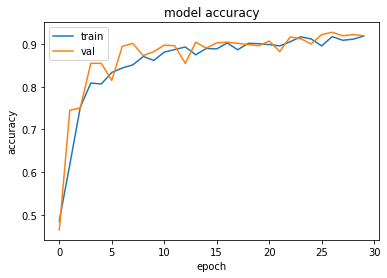

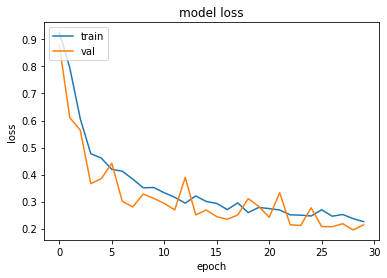

In [30]:
#validation set :Its purpose is to track progress through validation loss and accuracy.
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
test_set = test_datagen.flow_from_directory('CHEST_xray/test',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical', shuffle= False)


Found 147 images belonging to 3 classes.


In [106]:
#224
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc
subfolders=["covid", "normal", "viral_pneumonia"]

# loop over images/files in the subfolders of the test folder
#actual_list=[]
prediction_list=[]
count_covid=0
count_normal=0
count_viral_pneumonia=0
for actual in subfolders:
    src_dir='CHEST_xray/test/'+actual
    files=os.listdir(src_dir) 
    print(len(files))
    
    
    
    for file in files:
        if file !="Thumbs.db":
            

            
                
            src_file_path=os.path.join(src_dir, file)
            #print(src_file_path)
            test_image = image.load_img(src_file_path, target_size = (500, 500))
            test_image = image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis = 0)
            result = model.predict(test_image)
            #print(result)
            training_set.class_indices
            #capturing prediction in an array
            if int(result[0][0])==1:
                prediction = 'Covid'
                prediction_list.append(2)
                               
            
            elif int(result[0][1])==1:
                prediction = 'Normal'
                prediction_list.append(0)
                
                
         
                
            elif int(result[0][2])==1:
                
                prediction = 'Viral Pneumonia'
                prediction_list.append(1)
 
            else:
                continue
                        # capturing actual in an array    
            if actual=="covid":
          
                count_covid +=1
            
            elif actual=="normal":
         
                count_normal +=1
           
            elif actual=="viral_pneumonia":
                count_viral_pneumonia +=1
      
            print(prediction)

actual_list=[2]*count_covid+[0]*count_normal+[1]*count_viral_pneumonia
print(len(actual_list))
print(len(prediction_list))
print(count_covid, count_normal, count_viral_pneumonia)
# calculate metrics
print(accuracy_score(actual_list, prediction_list))
print(precision_score (actual_list, prediction_list, average= 'macro'))
print(recall_score (actual_list, prediction_list, average='macro'))
#print(roc_auc_score (actual_list, prediction_list, average='None')) 
print(confusion_matrix(actual_list, prediction_list)) 


#print(confusion_matrix (actual_list, prediction_list))    

11
Covid
Covid
Covid
Covid
Covid
Covid
Covid
Covid
Covid
Covid
Normal
68
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Viral Pneumonia
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
68
Normal
Viral Pneumonia
Covid
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Covid
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Vir

In [114]:
from keras.layers import Activation
# Building Logistic regression model 
#initialise with 1 layer which is amounts to logistic regression
model_lr = Sequential()
# Note the input shape is the desired size of the image 500x500 with 3 bytes color

model_lr.add(Flatten(input_shape=(500,500,3)))
model_lr.add(Dense(3))
model_lr.add(Activation('softmax'))

# to get the summary of the model
model_lr.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 750000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 2250003   
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 2,250,003
Trainable params: 2,250,003
Non-trainable params: 0
_________________________________________________________________


In [115]:
#loss function is default for multi-classification problem  
model_lr.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])



In [116]:
#augmentation configuration for training and testing 
train_datagen1 = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen1 = ImageDataGenerator(rescale = 1./255)




In [121]:
# Generate traning set
training_set1 = train_datagen1.flow_from_directory('CHEST_xray/train',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')
print(len(training_set1))

Found 2032 images belonging to 3 classes.
64


In [122]:
#Generate validation set
validation_set1 = test_datagen1.flow_from_directory('CHEST_xray/validate',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical')
print(len(validation_set1))

Found 726 images belonging to 3 classes.
23


In [123]:
#Generate history
history=model_lr.fit_generator(training_set1,epochs =30,steps_per_epoch=62 ,validation_data =validation_set1)

Epoch 1/30
62/62 [==============================] - 141s 2s/step - loss: 19.8619 - accuracy: 0.6667 - val_loss: 7.3541 - val_accuracy: 0.8099
Epoch 2/30
62/62 [==============================] - 139s 2s/step - loss: 12.8843 - accuracy: 0.7403 - val_loss: 10.7428 - val_accuracy: 0.8099
Epoch 3/30
62/62 [==============================] - 139s 2s/step - loss: 14.0713 - accuracy: 0.7226 - val_loss: 12.7289 - val_accuracy: 0.7190
Epoch 4/30
62/62 [==============================] - 139s 2s/step - loss: 26.0426 - accuracy: 0.6565 - val_loss: 17.7966 - val_accuracy: 0.7906
Epoch 5/30
62/62 [==============================] - 135s 2s/step - loss: 17.7431 - accuracy: 0.7342 - val_loss: 10.4470 - val_accuracy: 0.7879
Epoch 6/30
62/62 [==============================] - 134s 2s/step - loss: 16.8584 - accuracy: 0.7185 - val_loss: 28.2281 - val_accuracy: 0.6336
Epoch 7/30
62/62 [==============================] - 145s 2s/step - loss: 22.2851 - accuracy: 0.7180 - val_loss: 10.7495 - val_accuracy: 0.7961


In [124]:
# list all data in history
print(history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


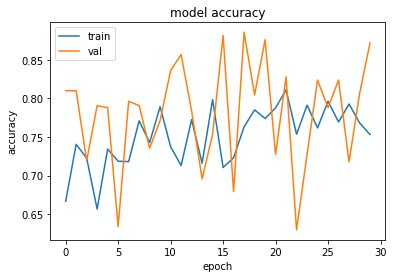

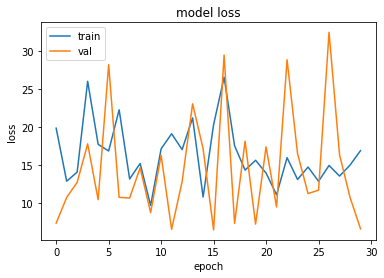

In [125]:
#validation set :Its purpose is to track progress through validation loss and accuracy.
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [126]:
test_set1 = test_datagen.flow_from_directory('CHEST_xray/test',
                                                target_size = (500, 500),
                                                batch_size = 32,
                                                class_mode = 'categorical', shuffle= False)


Found 147 images belonging to 3 classes.
5


In [129]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc
subfolders=["covid", "normal", "viral_pneumonia"]

# loop over images/files in the subfolders of the test folder
#actual_list=[]
prediction_list1=[]
count_covid=0
count_normal=0
count_viral_pneumonia=0
for actual in subfolders:
    src_dir='CHEST_xray/test/'+actual
    files=os.listdir(src_dir) 
    print(len(files))
    
    
    
    for file in files:
        if file !="Thumbs.db":
            

            
                
            src_file_path=os.path.join(src_dir, file)
            #print(src_file_path)
            test_image = image.load_img(src_file_path, target_size = (500, 500))
            test_image = image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis = 0)
            result = model_lr.predict(test_image)
            #print(result)
            training_set.class_indices
            #capturing prediction in an array
            if int(result[0][0])==1:
                prediction = 'Covid'
                prediction_list1.append(2)
                               
            
            elif int(result[0][1])==1:
                prediction = 'Normal'
                prediction_list1.append(0)
                
                
         
                
            elif int(result[0][2])==1:
                
                prediction = 'Viral Pneumonia'
                prediction_list1.append(1)
 
            else:
                continue
                        # capturing actual in an array    
            if actual=="covid":
          
                count_covid +=1
            
            elif actual=="normal":
         
                count_normal +=1
           
            elif actual=="viral_pneumonia":
                count_viral_pneumonia +=1
      
            print(prediction)

actual_list1=[2]*count_covid+[0]*count_normal+[1]*count_viral_pneumonia
print(len(actual_list1))
print(len(prediction_list1))
print(count_covid, count_normal, count_viral_pneumonia)
# calculate metrics
print(accuracy_score(actual_list1, prediction_list1))
print(precision_score (actual_list1, prediction_list1, average= 'macro'))
print(recall_score (actual_list1, prediction_list1, average='macro'))
#print(roc_auc_score (actual_list, prediction_list, average='None')) 
print(confusion_matrix(actual_list1, prediction_list1)) 


#print(confusion_matrix (actual_list, prediction_list))    

11
Covid
Covid
Covid
Covid
Covid
Viral Pneumonia
Covid
Covid
Covid
Covid
Viral Pneumonia
68
Normal
Normal
Viral Pneumonia
Normal
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Normal
Normal
Viral Pneumonia
Normal
Covid
Viral Pneumonia
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Normal
Normal
Viral Pneumonia
Viral Pneumonia
Normal
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Normal
Viral Pneumonia
68
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Normal
Viral Pneumonia
Normal
Viral Pneumonia
Covid
Viral Pneumonia
Viral Pneumonia
Covid
Viral Pneumonia
Viral Pneumonia
Viral 

In [137]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc
subfolders=["covid", "normal", "viral_pneumonia"]

# loop over images/files in the subfolders of the test folder
#actual_list=[]
prediction_list1=[]
count_covid=0
count_normal=0
count_viral_pneumonia=0
for actual in subfolders:
    src_dir='CHEST_xray/test/'+actual
    files=os.listdir(src_dir) 
    print(len(files))
    for file in files:
    
        src_file_path=os.path.join(src_dir, file)
        #print(src_file_path)
        test_image = image.load_img(src_file_path, target_size = (500, 500))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model_lr.predict_classes(test_image)
        #print(result)
        training_set.class_indices
        #capturing prediction in an array
        if result[0]==0:
            #prediction = 'Covid'
            prediction_list1.append(0)
                               
            
        elif result[0]==1:
                #prediction = 'Normal'
                prediction_list1.append(1)
                
                
         
                
        elif result[0]==2:
                
                #prediction = 'Viral Pneumonia'
                prediction_list1.append(2)
 
        else:
            pass
                        # capturing actual in an array    
        if actual=="covid":
          
                count_covid +=1
            
        elif actual=="normal":
         
                count_normal +=1
           
        elif actual=="viral_pneumonia":
                count_viral_pneumonia +=1
        else:
            pass
            #print(prediction)

actual_list1=[0]*count_covid+[1]*count_normal+[2]*count_viral_pneumonia
print(len(actual_list1))
print(len(prediction_list1))
print(count_covid, count_normal, count_viral_pneumonia)
# calculate metrics
print(accuracy_score(actual_list1, prediction_list1))
print(precision_score (actual_list1, prediction_list1, average= 'macro'))
print(recall_score (actual_list1, prediction_list1, average='macro'))
#print(roc_auc_score (actual_list, prediction_list, average='None')) 
print(confusion_matrix(actual_list1, prediction_list1)) 


#print(confusion_matrix (actual_list, prediction_list))    

11
68
68
147
147
11 68 68
0.8231292517006803
0.7721637426900584
0.82174688057041
[[ 9  0  2]
 [ 1 53 14]
 [ 5  4 59]]
